In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [3]:
# Paso 1: Preprocesamiento de datos (ejemplo básico)
# Supongamos que tenemos la siguiente serie de tiempo prueba
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) 
print("time_series: ",time_series)
train_size = int (len(time_series) * 0.6)

time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [4]:
# Tamaño del conjunto de entrenamiento 
train_data, test_data = time_series[:train_size], time_series[train_size:] 
print("train_data:", train_data) 
print("test_data",test_data)

train_data: [1 2 3 4 5 6 7 8 9]
test_data [10 11 12 13 14 15]


In [7]:
# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length]) 
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [9]:
# Definimos el número de pasos de tiempo para la serie temporal 
seq_length = 4

In [10]:
#Creamos conjuntos de entrenamiento y prueba en formato 3D 
X_train, y_train = create_dataset(train_data, seq_length) 
X_test, y_test = create_dataset (test_data, seq_length)

In [11]:
#Imprimimos los conjuntos de datos en formato 3D
print("Conjunto de secuencias de entrenamiento:\n", X_train) 
print("Etiquetas de entrenamiento:\n", y_train) 
print("Conjunto de secuencias de prueba: \n", X_test)
print("Etiquetas de prueba: \n", y_test)

Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba: 
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba: 
 [14 15]


In [13]:
# Paso 3: Construcción del modelo
model = Sequential()
model.add(SimpleRNN (16, activation='relu', input_shape=(seq_length, 1))) 
model.add (Dense(1))

C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Paso 4: Compilacion del modelo
model.compile(optimizer='adam', loss='mse')

In [17]:
# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 24.7609
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 23.3125
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 21.9893
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.6754
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 19.4150
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 18.2095
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.0453
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 15.9275
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 14.8555
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.8294
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.8654
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.9463
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.0693
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.2249
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.4303
Epoch 1

<Axes: >

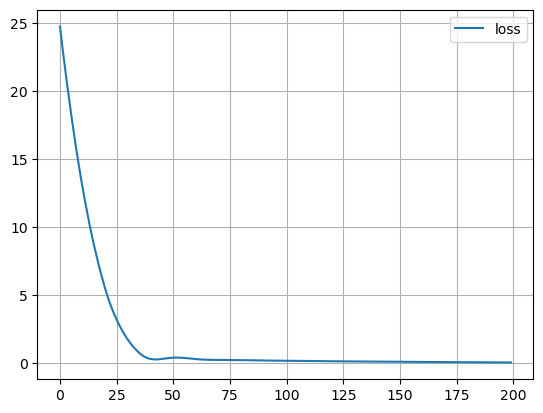

In [19]:
# Paso 6: Graficar el historial de entrenamiento: 
pd.DataFrame(history.history).plot(grid=True)

In [20]:
# Paso 7: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test) 
print(Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 2.7316
2.731567859649658


In [21]:
# Paso 8: Predicción
print("X_test: \n",X_test)
print("y_test: \n",y_test)
y_pred = model.predict(X_test) 
print("y_pred: \n",y_pred)

X_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
y_pred: 
 [[15.510947]
 [16.783304]]
